<a href="https://colab.research.google.com/github/fatidevt/heart-disease-project/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PHASE 1: COLLECTE DE DONNÉES
import pandas as pd

# Charger le dataset depuis fichier local

df = pd.read_csv("heart.csv")

# Vérification des types de colonnes
df.dtypes

# Vérification des valeurs manquantes
df.isnull().sum()

# Statistiques descriptives des colonnes numériques
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB



1️⃣ Description du dataset
   Taille: 1190 lignes × 12 colonnes
   Colonnes: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']

   Types de variables:
age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

   Statistiques descriptives:
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.42

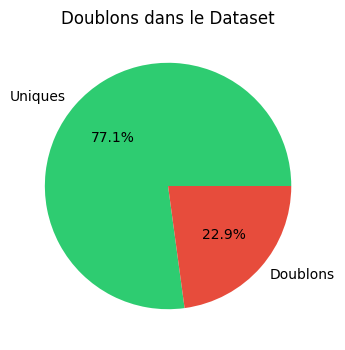


4️⃣ Outliers (valeurs aberrantes)


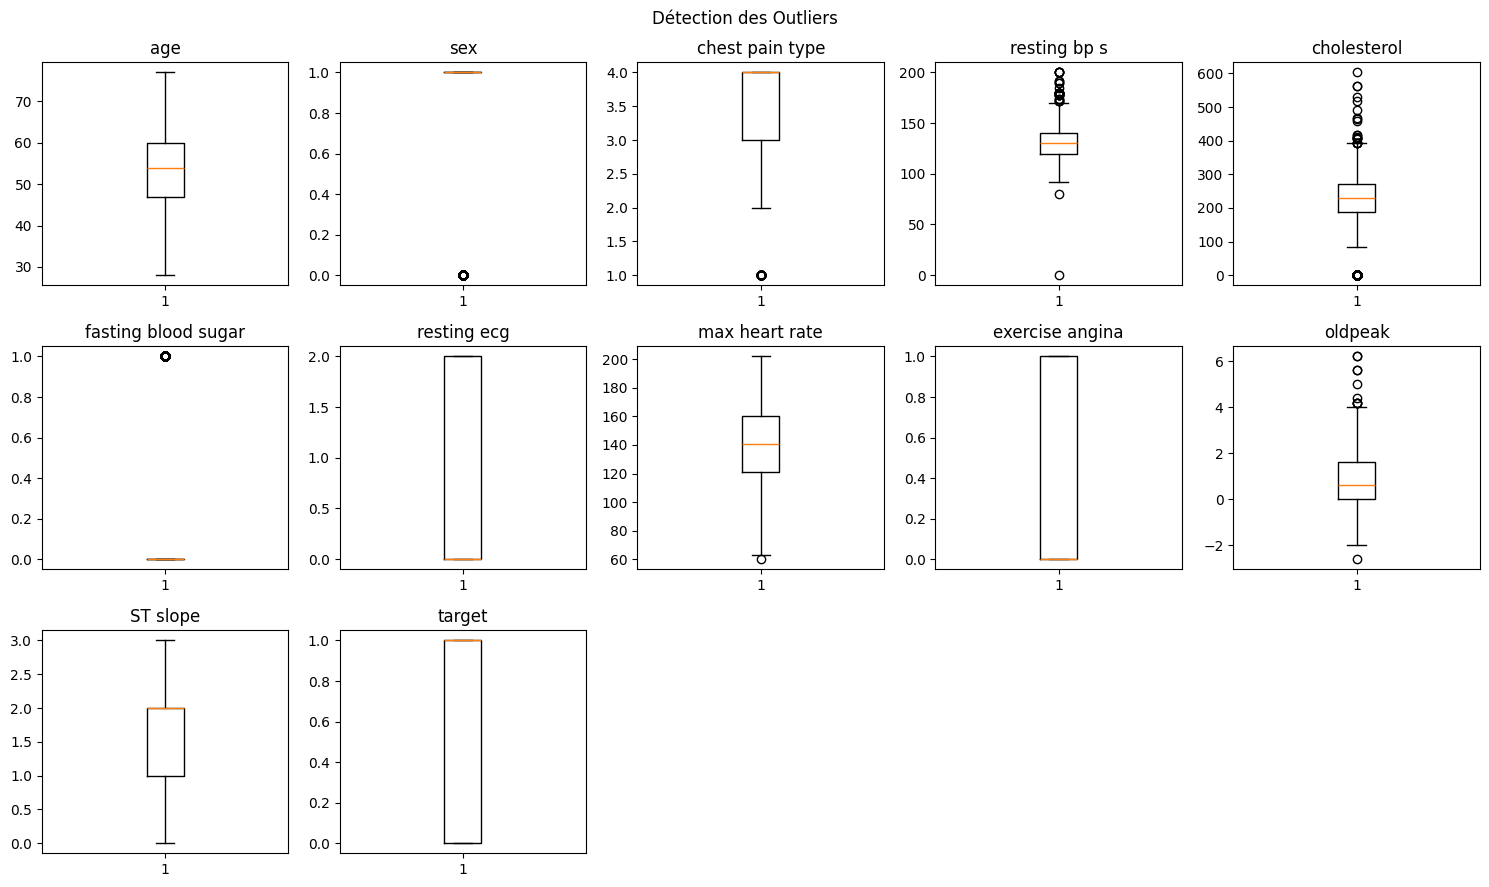


   Nombre d’outliers par variable:
   - sex: 281 outliers
   - chest pain type: 66 outliers
   - resting bp s: 37 outliers
   - cholesterol: 193 outliers
   - fasting blood sugar: 254 outliers
   - max heart rate: 1 outliers
   - oldpeak: 11 outliers

5️⃣ Équilibre des classes
   Variable cible: target

   Distribution des classes:
target
1    629
0    561
Name: count, dtype: int64


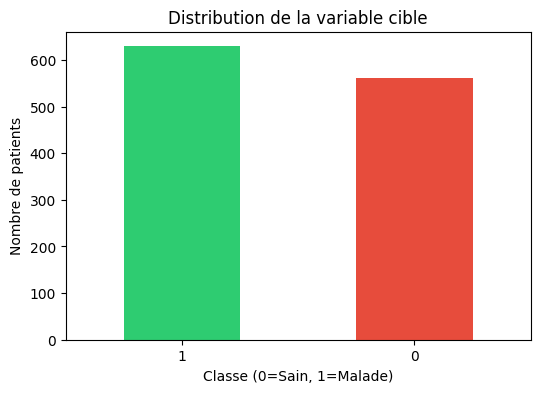


   Ratio: 0.89
   ✓ Classes équilibrées

RÉSUMÉ DE LA PHASE 3
  - Dataset: 1190 lignes × 12 colonnes
  - Valeurs manquantes: 0
  - Doublons: 272
  - Outliers: Présents dans plusieurs variables
  - Classes: Équilibrées (ratio: 0.89)


In [ ]:
# PHASE 3: COMPRÉHENSION DES DONNÉES (DATA UNDERSTANDING)
import matplotlib.pyplot as plt
import seaborn as sns

print("\n1️⃣ Description du dataset")
print(f"   Taille: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"   Colonnes: {list(df.columns)}")
print("\n   Types de variables:")
print(df.dtypes)
print("\n   Statistiques descriptives:")
print(df.describe())

# =========================================
print("\n2️⃣ Valeurs manquantes")
missing = df.isnull().sum()
print(missing)
if missing.sum() == 0:
    print("   ✓ Aucune valeur manquante")
else:
    print(f"   ⚠️  {missing.sum()} valeurs manquantes trouvées")

# =========================================
# 3️⃣ DOUBLONS
# =========================================
print("\n3️⃣ Doublons")
duplicates = df.duplicated().sum()
print(f"   Nombre de doublons: {duplicates}")
print(f"   Pourcentage: {duplicates/len(df)*100:.1f}%")

if duplicates > 0:
    print(f"   ⚠️  {duplicates} lignes à supprimer")

    # Visualisation
    plt.figure(figsize=(6, 4))
    labels = ['Uniques', 'Doublons']
    sizes = [len(df) - duplicates, duplicates]
    colors = ['#2ecc71', '#e74c3c']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title('Doublons dans le Dataset')
    plt.show()

# =========================================
# 4️⃣ OUTLIERS
# =========================================
print("\n4️⃣ Outliers (valeurs aberrantes)")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Boxplots pour toutes les colonnes numériques
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(col)

# Masquer axes vides
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Détection des Outliers')
plt.tight_layout()
plt.show()

# Compter les outliers par IQR
print("\n   Nombre d’outliers par variable:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    if len(outliers) > 0:
        print(f"   - {col}: {len(outliers)} outliers")

# =========================================
# 5️⃣ ÉQUILIBRE DES CLASSES (VARIABLE CIBLE)
# =========================================
print("\n5️⃣ Équilibre des classes")
target_col = 'target'
print(f"   Variable cible: {target_col}")
print("\n   Distribution des classes:")
print(df[target_col].value_counts())

# Graphique de distribution
plt.figure(figsize=(6, 4))
df[target_col].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution de la variable cible')
plt.xlabel('Classe (0=Sain, 1=Malade)')
plt.ylabel('Nombre de patients')
plt.xticks(rotation=0)
plt.show()

# Calcul du ratio
class_counts = df[target_col].value_counts()
ratio = class_counts.min() / class_counts.max()
print(f"\n   Ratio: {ratio:.2f}")
if ratio < 0.5:
    print("   ⚠️  Classes déséquilibrées")
else:
    print("   ✓ Classes équilibrées")

# =========================================
# 6️⃣ RÉSUMÉ
# =========================================
print("\n" + "="*60)
print("RÉSUMÉ DE LA PHASE 3")
print(f"  - Dataset: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"  - Valeurs manquantes: {missing.sum()}")
print(f"  - Doublons: {duplicates}")
print(f"  - Outliers: Présents dans plusieurs variables")
print(f"  - Classes: {'Équilibrées' if ratio >= 0.5 else 'Déséquilibrées'} (ratio: {ratio:.2f})")
print("="*60)

In [ ]:
# PHASE 4 : DATA PREPARATION
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1️⃣ Load dataset
df = pd.read_csv("heart.csv")

# 2️⃣ Rename target column (adjust if needed)
df = df.rename(columns={"Heart Disease": "target"})

# 3️⃣ Remove duplicates
df = df.drop_duplicates()

# 4️⃣ Handle missing values (GENERIC – no column names)
# Convert all columns to numeric when possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Fill missing values in numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# 5️⃣ Encode target variable
# If target is already numeric (0/1), this will NOT break
df['target'] = df['target'].astype(float)

# Remove rows where target is missing
df = df.dropna(subset=['target'])

# 6️⃣ Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# 7️⃣ Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8️⃣ Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 9️⃣ Final checks
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Missing values in target:", y.isna().sum())

Train shape: (734, 11)
Test shape: (184, 11)
Missing values in target: 0


/tmp/ipython-input-302956610.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Dataset shape: (1190, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.00000

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000



Missing values per column:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


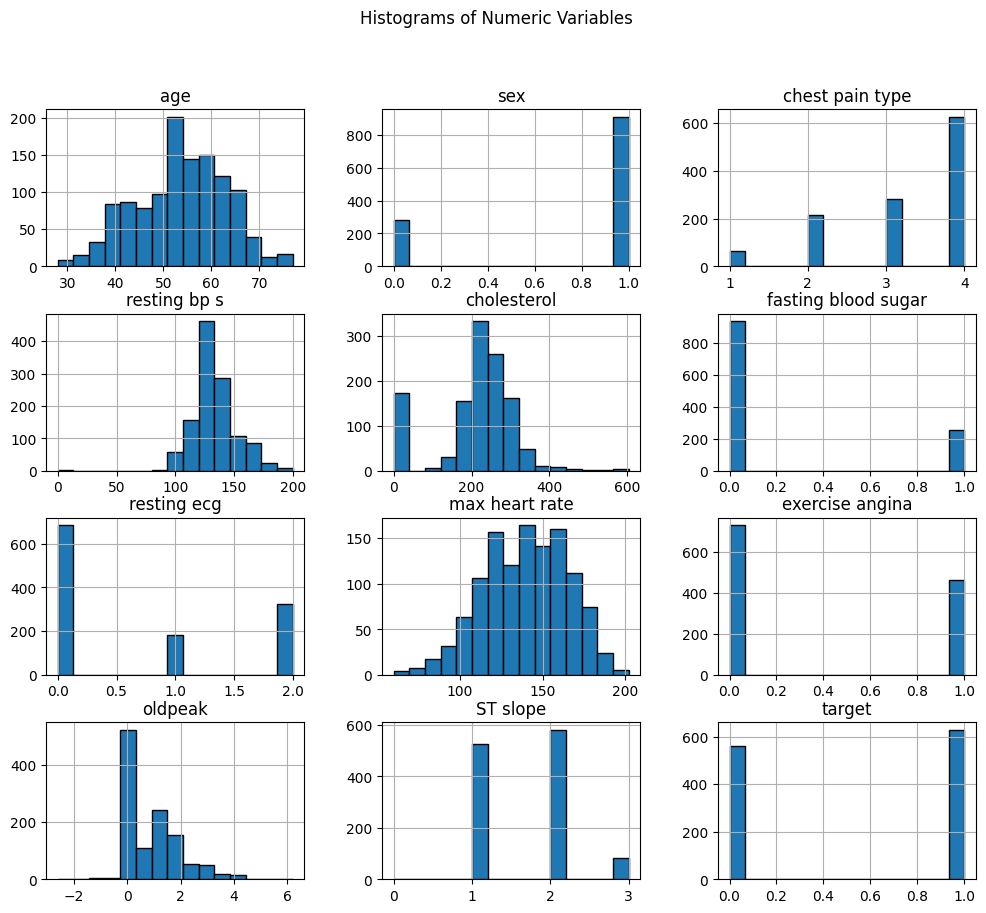

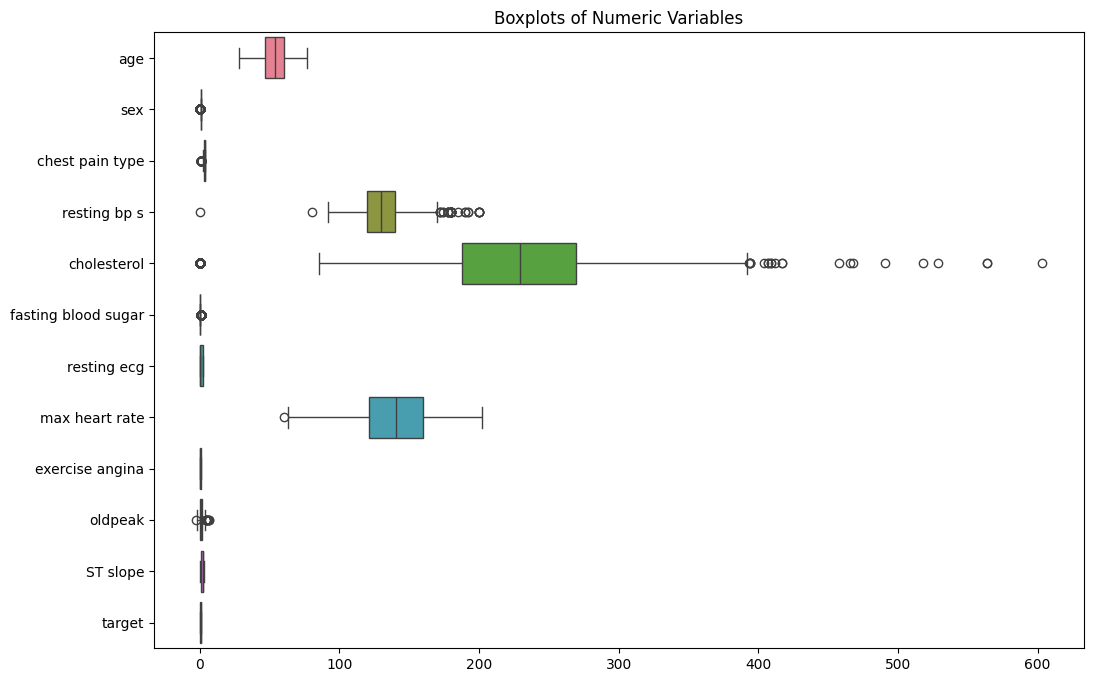

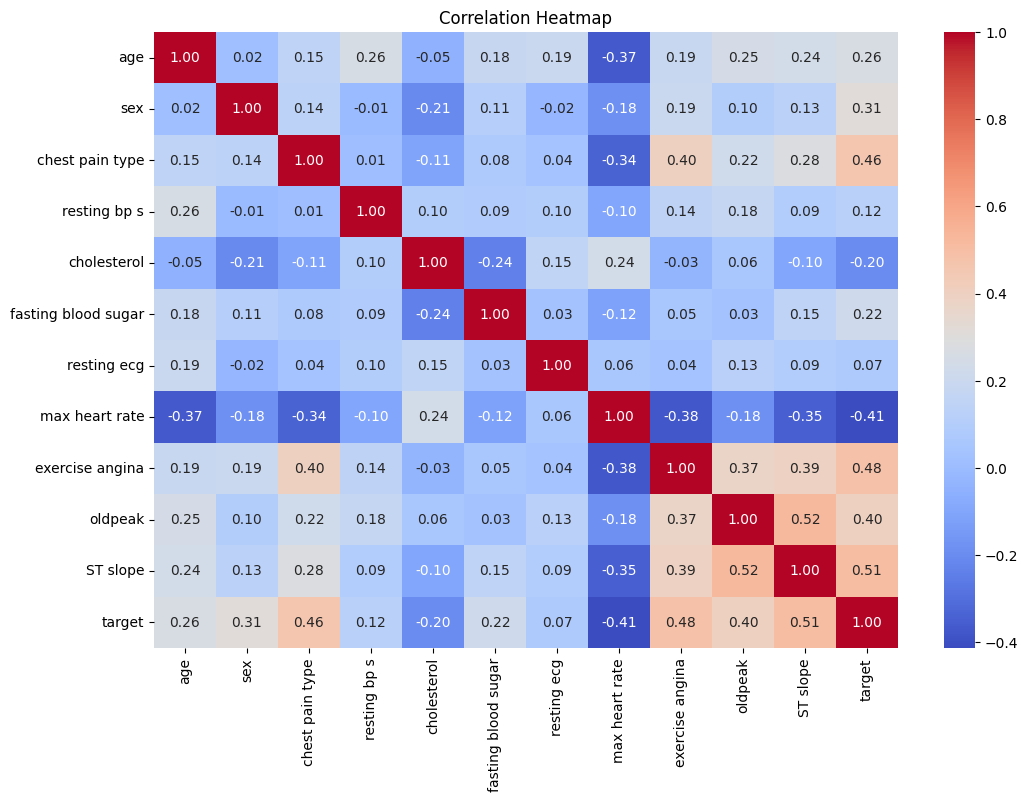

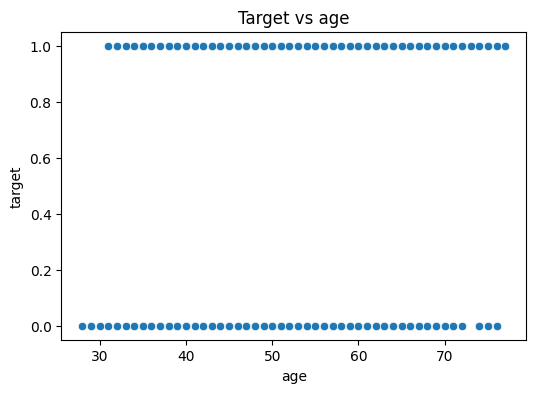

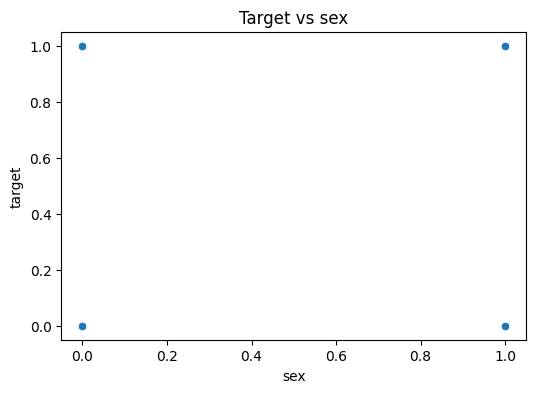

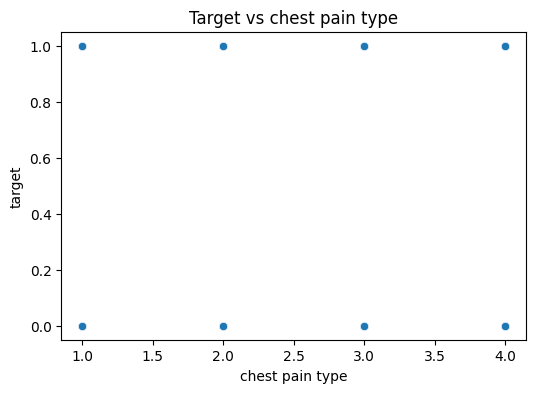

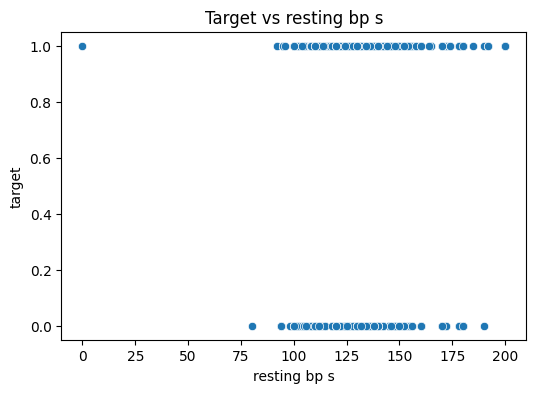

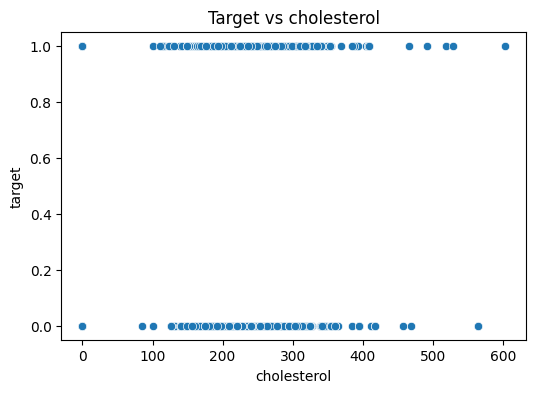

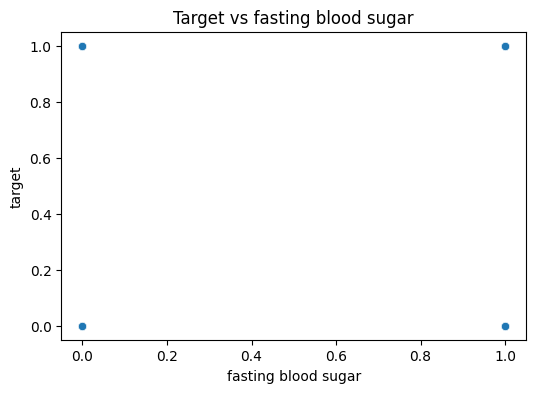

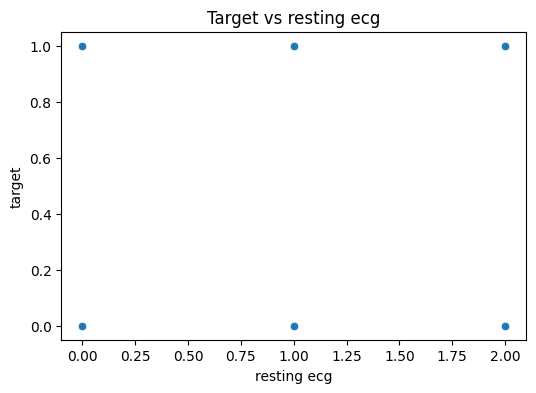

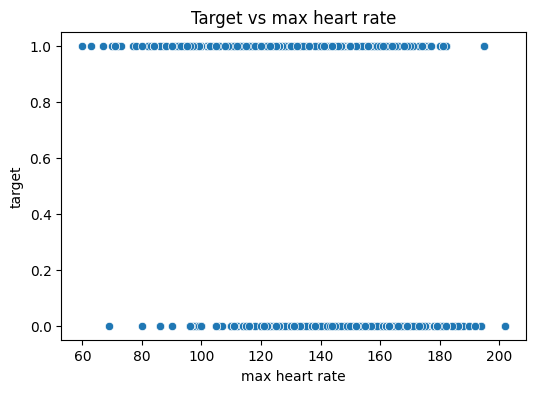

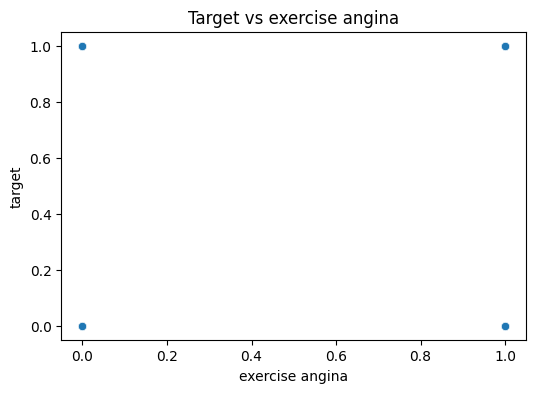

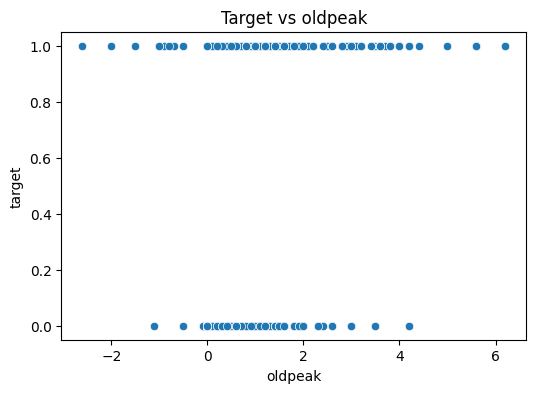

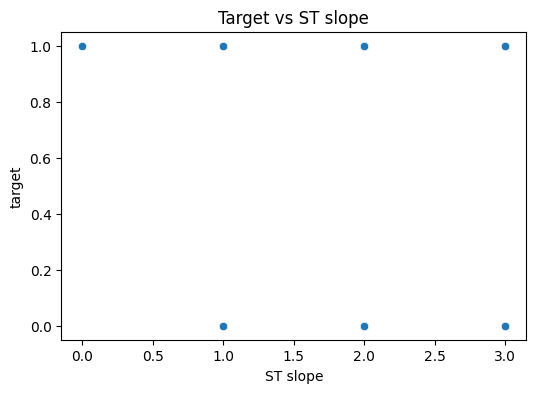

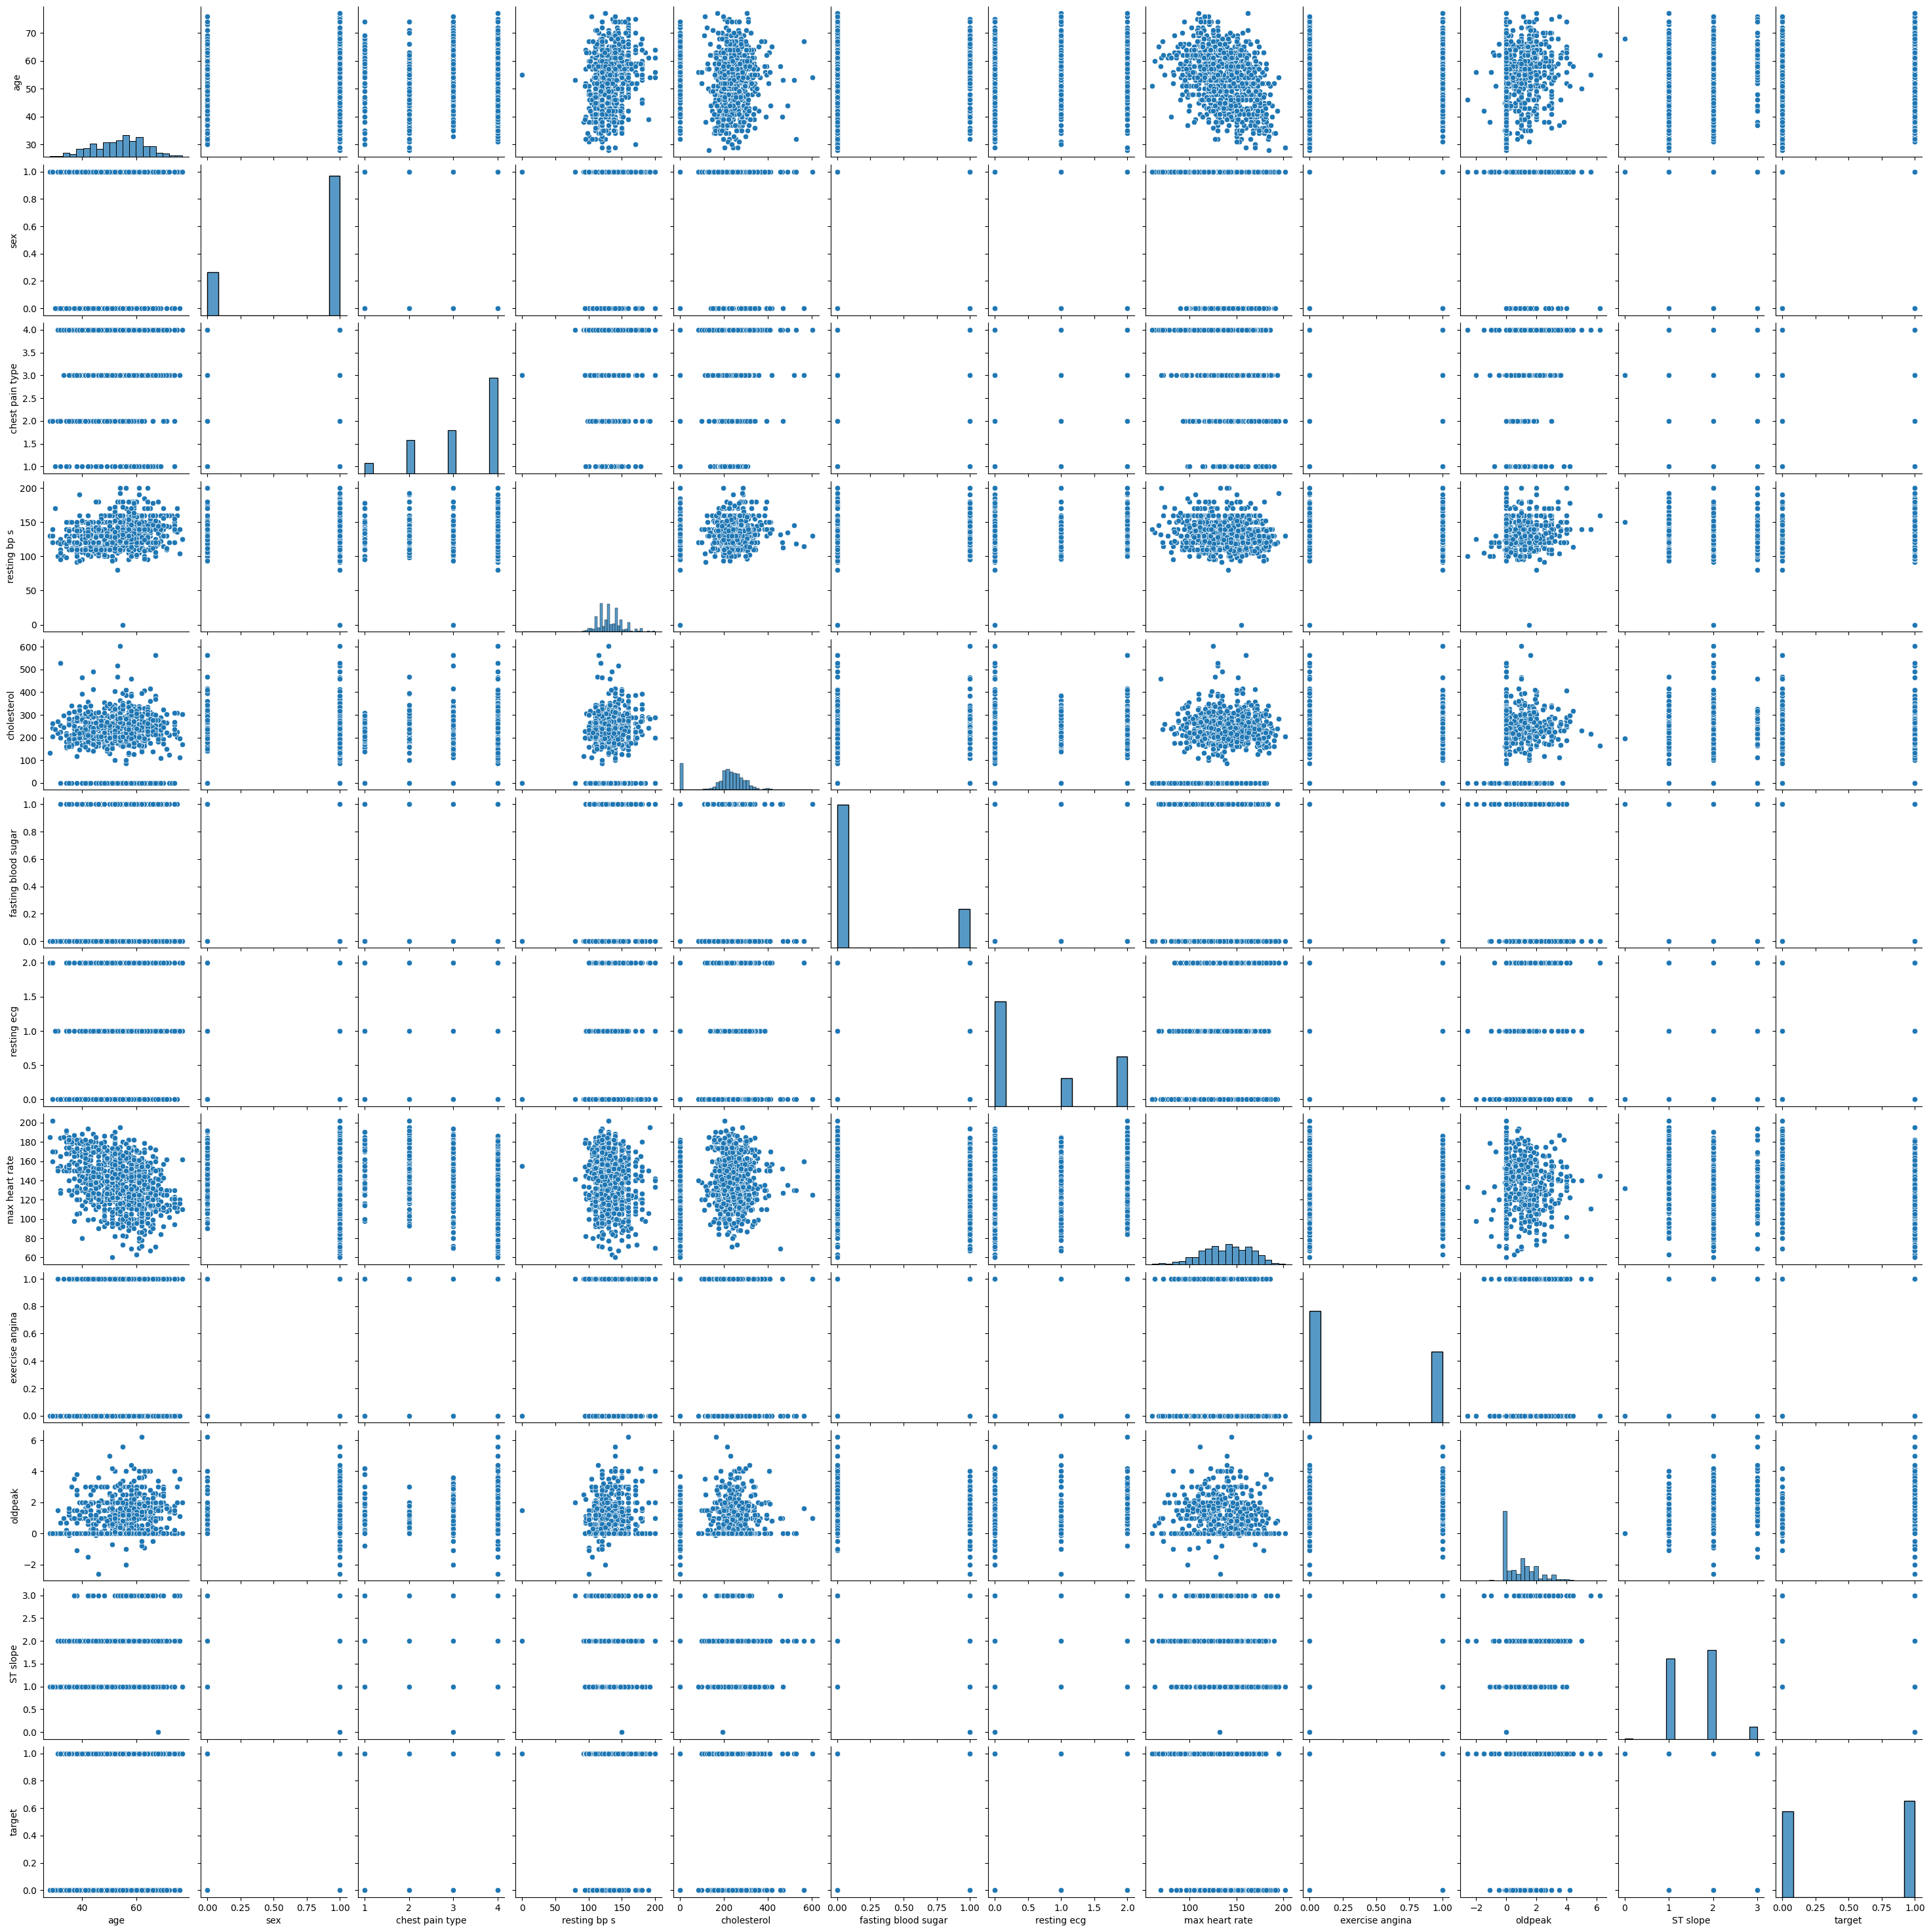


Hypothèses initiales :
- Cholesterol plus élevé pourrait être lié à la présence de maladie cardiaque
- Age et pression sanguine peuvent influencer le risque
- Les relations fortes apparaissent sur la heatmap de corrélation


In [31]:
# PHASE 5 : EXPLORATORY DATA ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load dataset (if not already loaded)
df = pd.read_csv("heart.csv")

# 2️⃣ Quick overview
print("Dataset shape:", df.shape)
print(df.info())
print(df.describe())  # Statistiques descriptives
display(df.describe())

# 3️⃣ Check missing values
print("\nMissing values per column:")
print(df.isna().sum())

# 4️⃣ Histograms for numeric variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle("Histograms of Numeric Variables")
plt.show()

# 5️⃣ Boxplots for numeric variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Boxplots of Numeric Variables")
plt.show()

# 6️⃣ Heatmap of correlations
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 7️⃣ Scatterplots for target vs numeric features
if 'target' in df.columns:
    for col in numeric_cols:
        if col != 'target':
            plt.figure(figsize=(6,4))
            sns.scatterplot(x=df[col], y=df['target'])
            plt.title(f"Target vs {col}")
            plt.show()

# 8️⃣ Pairplot for quick scatter + distribution overview
sns.pairplot(df[numeric_cols])
plt.show()

# 9️⃣ Hypotheses initiales (example)
print("\nHypothèses initiales :")
print("- Cholesterol plus élevé pourrait être lié à la présence de maladie cardiaque")
print("- Age et pression sanguine peuvent influencer le risque")
print("- Les relations fortes apparaissent sur la heatmap de corrélation")

In [ ]:
display(df.describe())

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Logistic Regression Accuracy: 0.8478260869565217
KNN Accuracy: 0.8478260869565217
Logistic Regression CV Mean: 0.8501537601341906
KNN CV Mean: 0.8624172956853974
Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        77
         1.0       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



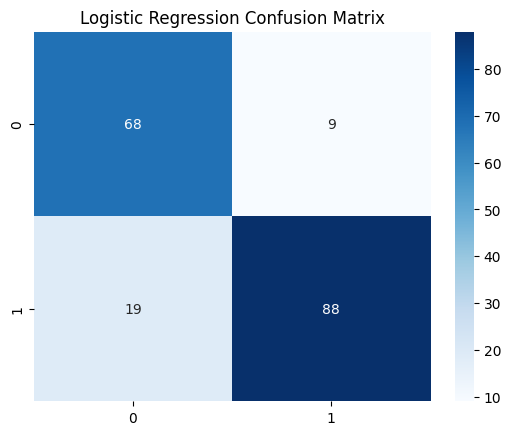

KNN Report:
               precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        77
         1.0       0.90      0.83      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



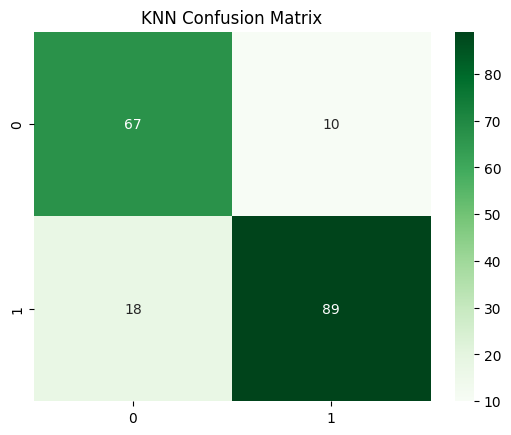

In [33]:
# Phase 6: Modélisation et Analyse

# 1️⃣ Import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 2️⃣ Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
log_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_acc)

# 5️⃣ K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_acc)

# 6️⃣ Cross-validation (5 folds)
cv_scores_log = cross_val_score(log_model, X_train_scaled, y_train, cv=5)
cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print("Logistic Regression CV Mean:", cv_scores_log.mean())
print("KNN CV Mean:", cv_scores_knn.mean())

# 7️⃣ Confusion Matrix & Classification Report

# Logistic Regression
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# KNN
print("KNN Report:\n", classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title("KNN Confusion Matrix")
plt.show()

Logistic Regression Metrics:
Accuracy: 0.85, Precision: 0.91, Recall: 0.82, F1-score: 0.86, ROC-AUC: 0.91

KNN Metrics:
Accuracy: 0.85, Precision: 0.90, Recall: 0.83, F1-score: 0.86, ROC-AUC: 0.93


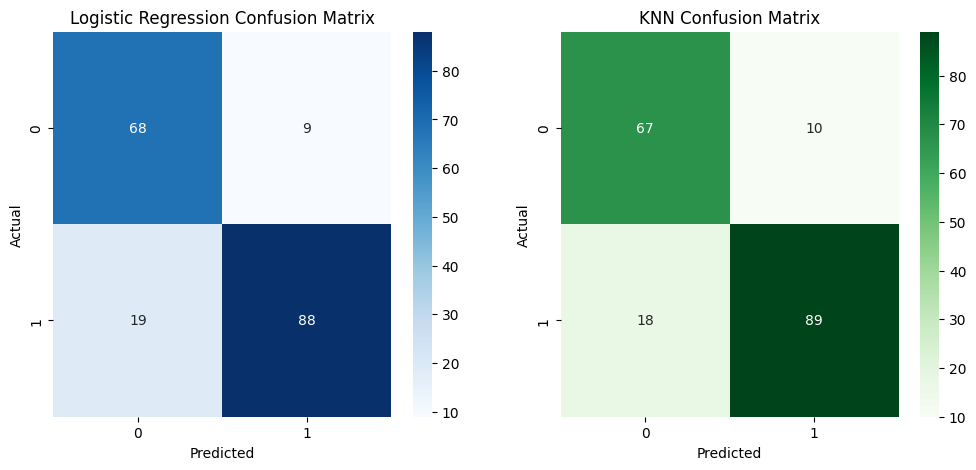

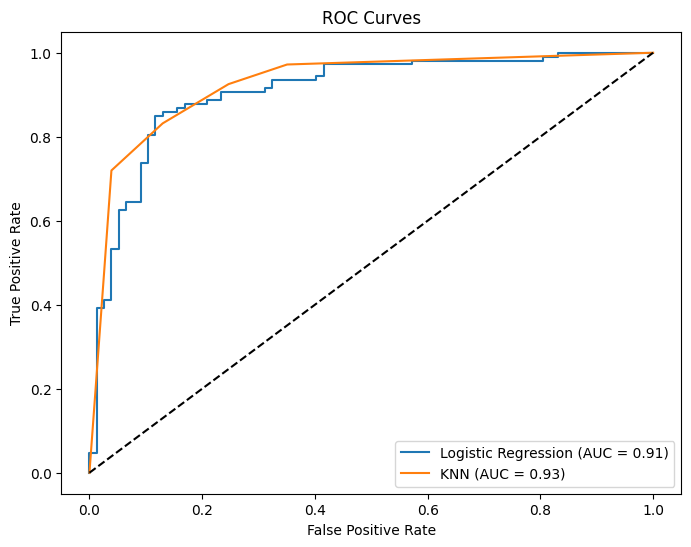

In [30]:
# Phase 7: Évaluation des modèles

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Compute metrics for Logistic Regression
log_acc = accuracy_score(y_test, y_pred_log)
log_prec = precision_score(y_test, y_pred_log)
log_rec = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:,1])

print("Logistic Regression Metrics:")
print(f"Accuracy: {log_acc:.2f}, Precision: {log_prec:.2f}, Recall: {log_rec:.2f}, F1-score: {log_f1:.2f}, ROC-AUC: {log_roc_auc:.2f}")

# 2️⃣ Compute metrics for KNN
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_prec = precision_score(y_test, y_pred_knn)
knn_rec = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:,1])

print("\nKNN Metrics:")
print(f"Accuracy: {knn_acc:.2f}, Precision: {knn_prec:.2f}, Recall: {knn_rec:.2f}, F1-score: {knn_f1:.2f}, ROC-AUC: {knn_roc_auc:.2f}")

# 3️⃣ Confusion Matrix visualization
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Logistic Regression CM
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# KNN CM
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("KNN Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()

# 4️⃣ ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:,1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {log_roc_auc:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {knn_roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

Top features influencing Logistic Regression:
                Feature  Coefficient
10             ST slope     0.932683
2       chest pain type     0.586266
8       exercise angina     0.573716
1                   sex     0.474164
9               oldpeak     0.466592
5   fasting blood sugar     0.413819
4           cholesterol    -0.399938
7        max heart rate    -0.201318
0                   age     0.132778
3          resting bp s     0.065005


/tmp/ipython-input-1841429223.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Abs_Coeff', y='Feature', data=feature_importance_log.head(10), palette='viridis')


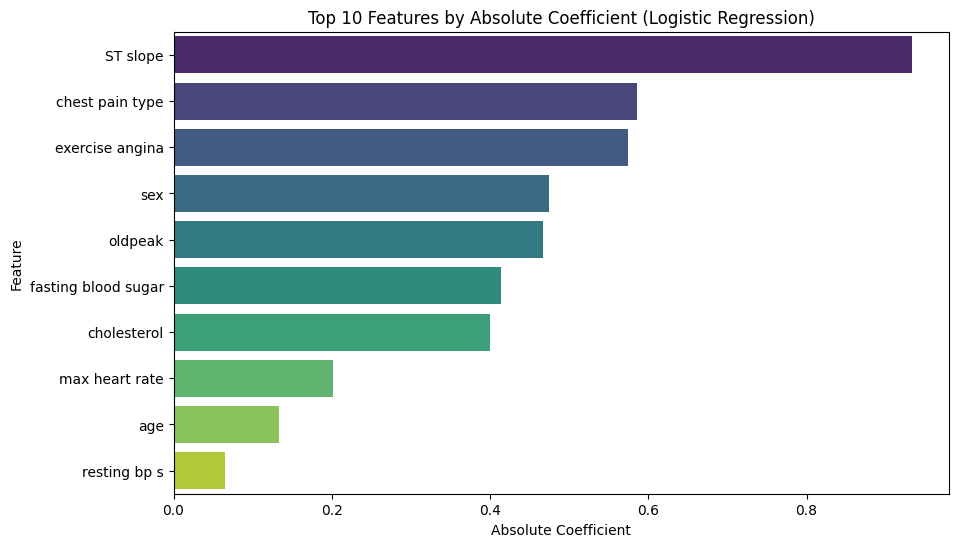

Top features influencing KNN (Permutation Importance):
                Feature  Importance
10             ST slope    0.107065
2       chest pain type    0.045652
4           cholesterol    0.027717
5   fasting blood sugar    0.027174
9               oldpeak    0.025000
8       exercise angina    0.025000
1                   sex    0.020109
3          resting bp s    0.011957
7        max heart rate    0.007609
0                   age    0.003261


/tmp/ipython-input-1841429223.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_knn.head(10), palette='magma')


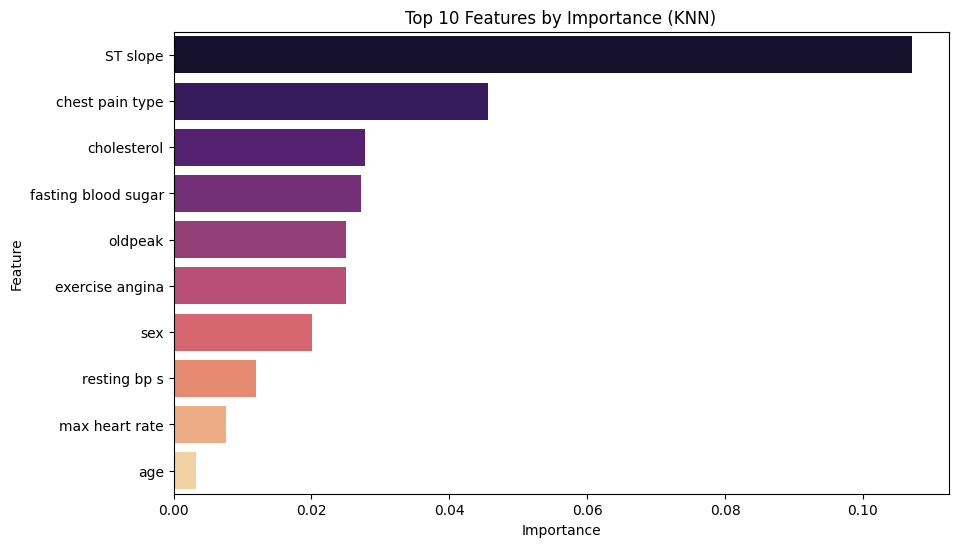


- Les coefficients et importances montrent quelles variables impactent le plus la prédiction.
- Logistic Regression est linéaire, donc sensible aux relations non-linéaires.
- KNN est sensible aux valeurs aberrantes et à l'échelle des variables.
- Risques: biais de données si certaines classes sont sous-représentées.
- Limites: données manquantes, qualité des mesures (ex: cholesterol à 0 remplacé par NaN).
- Recommandations: collecter plus de données, tester d'autres modèles comme Random Forest, Gradient Boosting, ou appliquer feature engineering.



In [29]:
# Phase 8: Interprétation & Discussion

# 1️⃣ Feature Importance for Logistic Regression (coefficients)
feature_importance_log = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
})
feature_importance_log['Abs_Coeff'] = np.abs(feature_importance_log['Coefficient'])
feature_importance_log.sort_values(by='Abs_Coeff', ascending=False, inplace=True)

print("Top features influencing Logistic Regression:")
print(feature_importance_log[['Feature', 'Coefficient']].head(10))

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='Abs_Coeff', y='Feature', data=feature_importance_log.head(10), palette='viridis')
plt.title("Top 10 Features by Absolute Coefficient (Logistic Regression)")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.show()

# 2️⃣ Feature Importance for KNN (Permutation Importance)
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
feature_importance_knn = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Top features influencing KNN (Permutation Importance):")
print(feature_importance_knn.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_knn.head(10), palette='magma')
plt.title("Top 10 Features by Importance (KNN)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()